# HyperParameter Tuning

### Hyperparameter Tuning

#### In true machine learning fashion, we ideally ask the machine to  explore and select the optimal model architecture automatically. Parameters which which govern the entire learning process of a model are referred to as hyperparameters and thus this process of searching for the ideal model architecture is referred to as hyperparameter tuning. 

#### A hyperparameter is a parameter whose value is set before the learning process begin and thus controls the learning process of a model when trained on training data.


### Need of Hyperparameter Tuning

#### Hyperparameters are important because they directly control the behaviour of the training algorithm and have a significant impact on the performance of the model being trained. “A good choice of hyperparameters can really make an algorithm shine”.

### Hyperparameters Tuning Techniques

#### 1. Grid Search : Grid search is a traditional way to perform hyperparameter optimization. It works by searching exhaustively through a specified subset of hyperparameters.

#### 2. Random Search: Random search differs from grid search mainly in that it searches the specified subset of hyperparameters randomly instead of exhaustively. The major benefit being decreased processing time.

#### 3. Bayesian Optimisation: Bayesian optimization is a sequential design strategy for global optimization of black-box functions that doesn't require derivatives.











In [1]:
# Importing required libraries

import numpy as np #  for linear algebra
import pandas as pd #  for data processing

In [2]:
# Set the working directory
import os
os.chdir(r"C:\Users\kusum\Desktop\Python")

In [11]:
# Reading the datset
df=pd.read_csv('Dataset_spine.csv')
print(df.head(10))

        Col1       Col2       Col3       Col4        Col5       Col6  \
0  63.027818  22.552586  39.609117  40.475232   98.672917  -0.254400   
1  39.056951  10.060991  25.015378  28.995960  114.405425   4.564259   
2  68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317   
3  69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
4  49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   
5  40.250200  13.921907  25.124950  26.328293  130.327871   2.230652   
6  53.432928  15.864336  37.165934  37.568592  120.567523   5.988551   
7  45.366754  10.755611  29.038349  34.611142  117.270068 -10.675871   
8  43.790190  13.533753  42.690814  30.256437  125.002893  13.289018   
9  36.686353   5.010884  41.948751  31.675469   84.241415   0.664437   

       Col7     Col8     Col9     Col10      Col11    Col12 Class_att  
0  0.744503  12.5661  14.5386  15.30468 -28.658501  43.5123  Abnormal  
1  0.415186  12.8874  17.5323  16.78486 -25.530607  16.1102  Ab

In [14]:
# Relabelling columns
col_name = ['pelvic_incidnece','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis',
           'pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','Class_att']
df.columns = col_name

df.head(2)

,pelvic_incidnece,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal


In [9]:
# Summary of data

df.describe()

,pelvic_incidnece,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [15]:
print(df.dtypes)  # To get the columns types
print(df.shape)  # size of dataframe

pelvic_incidnece            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
pelvic_slope                float64
Direct_tilt                 float64
thoracic_slope              float64
cervical_tilt               float64
sacrum_angle                float64
scoliosis_slope             float64
Class_att                    object
dtype: object
(310, 13)


#### Dataset:Lower backpain symptoms dataset.
The data has 310 Observations, 13 variables out of which 12 are Numeric and 1 Binary Class Attribute. 
This data set is about to identify if a person is abnormal or normal using collected physical spine details.

In [16]:
# Checking for missing values

df.columns[df.isnull().any()]


Index([], dtype='object')

We do not have missing values in any of the columns.

In [17]:
#replacing Abnormal and Normal with 1 and 0 respectively
df.Class_att=df.Class_att.map({'Abnormal':1,'Normal':0})
df.head()

,pelvic_incidnece,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1


##### Train-test split

In [18]:
from sklearn.model_selection import train_test_split

In [182]:
# Test train split
x = df.drop(columns='Class_att')
y = np.array(df['Class_att'])

In [183]:
# Splitting data into testing and training.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=15)

In [26]:
# Checking the size 
print(x_train.shape)  # Train input
print(y_train.shape)  # Train output
print(x_test.shape)   # To be predicted 
print(y_test.shape)   # Expected test output

(217, 12)
(217,)
(93, 12)
(93,)


### 1. BaggingClassifier

#### (Bootstrap Aggregating) is the ensemble method that involves manipulating the training set by resampling and running algorithms on it. Bagging classifier uses a process called bootstrapped dataset to create multiple datasets from one original dataset and runs algorithm on each one of them. After running a learning algorithm on each one of the bootstrapped datasets, all models are combined by taking their average or mode. The unseen data then goes through this averaged classifier/combined classifier and predict the output.

#### 1.1 Without HyperParameter Tuning

In [42]:
import sklearn.ensemble as ensemble
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [105]:
# model with default parameters
model_bagging=ensemble.BaggingClassifier()
# Training the model
model_bagging.fit(x_train,y_train)
# Predictiing the test data
pred=model_bagging.predict(x_test)
# checking for oob score
print("oob score : ",grid.oob_score_)


                 

oob score :  0.7880184331797235


#### 1.2 With Hyperparameter Tuning

In [162]:
n_estimators = [50,60,70,80,100,150,200,250,300]
for i in n_estimators:
    grid =ensemble.BaggingClassifier(base_estimator=None, ## If None, then the base estimator is a decision tree.
                                     n_estimators=i,    # The number of base estimators in the ensemble. Default is 10
                                     oob_score=True)   # Use out-of-bag samples to estimate the generalization error.
    # Training the model
    grid.fit(x_train,y_train)
    # Predicting the test data 
    pred1=grid.predict(x_test)
    print("For", i," no. of estimators")
    # checking for oob score
    print("oob score : ",grid.oob_score_)


For 50  no. of estimators
oob score :  0.7880184331797235
For 60  no. of estimators
oob score :  0.7926267281105991
For 70  no. of estimators
oob score :  0.8387096774193549
For 80  no. of estimators
oob score :  0.7972350230414746
For 100  no. of estimators
oob score :  0.7788018433179723
For 150  no. of estimators
oob score :  0.8018433179723502
For 200  no. of estimators
oob score :  0.8110599078341014
For 250  no. of estimators
oob score :  0.7880184331797235
For 300  no. of estimators
oob score :  0.783410138248848


Here we can clearly see that optimizing the hyperparameter n_estiamtor improves the accuracy of model from 78.80 to 83.87 percent when it changes from 10(default) to 70.

### 2. Decision Tree Classifier

 ##### 2.1 Without parameter tuning


In [154]:
from sklearn.tree import DecisionTreeClassifier

#making the instance
model= DecisionTreeClassifier(random_state=1234)

#learning
model.fit(x_train,y_train)

#Prediction
prediction=model.predict(x_test)

#importing the metrics module
from sklearn import metrics

#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

# Evaluate and Print confusion matrix
pd.DataFrame(metrics.confusion_matrix(y_test,prediction),columns=['Abnormal','Normal'],index=['Abnormal','Normal'])


Accuracy: 0.7419354838709677


,Abnormal,Normal
Abnormal,17,15
Normal,9,52


The accuracy of the model with default parameters of decision tree classifier is 74.19

##### 2.2 With parameter tuning - using GridSearchCV

In [163]:
from sklearn.model_selection import GridSearchCV

In [193]:
#making the instance
model= DecisionTreeClassifier()

#Hyper Parameters Set
param_grid = {"max_depth": [3, None],
              'max_features': ['auto', 'sqrt'],
              "min_samples_split": [6,8,9,10,12,14,16],
              "min_samples_leaf": [3,4,5],
               "criterion": ["gini", "entropy"]}

# Fitting model on hyperparameters
model1 = GridSearchCV(model, param_grid=param_grid, n_jobs=-1)

#Learning
model1.fit(x_train,y_train)

# To know the best set of hyperparamaters
print("Best Hyper Parameters:",model1.best_params_)

#Prediction
prediction=model1.predict(x_test)

#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

#Print confusion matrix
pd.DataFrame(metrics.confusion_matrix(y_test,prediction),columns=['Abnormal','Normal'],index=['Abnormal','Normal'])


Best Hyper Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 8}
Accuracy: 0.8817204301075269


,Abnormal,Normal
Abnormal,24,4
Normal,7,58


The accuracy has drastically improved from 74.19% to 88.17% after tuning the hyperparameters.

HYPERPARAMETERS           DEFAULT VALUE       OPTIMIZED VALUE

criterion                  Gini                Entropy
max_depth                  None                None
max_features               None(max)           sqrt
min_samples_leaf            1                    5
min_sample_split            2                    8

### 3. Random Forest (Classifier)

In [172]:
#importing modules
from sklearn.ensemble import RandomForestClassifier

#### 3.1 With default hyperparameters

In [184]:
#using default parameters to build random forest model

clf = RandomForestClassifier()  #n_estimators=100 by default
clf.fit(x_train, y_train)

  
predicted1 = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test,predicted1))
pd.DataFrame(metrics.confusion_matrix(y_test,predicted1),columns=['Abnormal','Normal'],index=['Abnormal','Normal'])

Accuracy: 0.8172043010752689


,Abnormal,Normal
Abnormal,20,8
Normal,9,56


With default setting of parameters in random forest the accuracy is 81.72%.

#### 3.2 With hyperparameters tuning- using GridSearchCV

In [199]:
#Generate forests containing  50,70,80,90,100,150,200,300 trees

#hyper parameters set
params = { "max_depth": [4,None],
           'criterion':['gini','entropy'],
           'min_samples_leaf':[2,3,4],
           'min_samples_split':[5,6,7,8], 
           'max_features':[7,9,10,11],
           'n_jobs':[-1]}

n_trees = [50,70,80,90,100,150,200,300] # List to set number of tress in random forest

for i in n_trees:
    ran_for = RandomForestClassifier(n_estimators=i,random_state=123) # creating instance
    ran_for=GridSearchCV(ran_for, param_grid=params, n_jobs=-1)       # finding the best parameters

    ran_for.fit(x_train,y_train)    # Learning                     
    pred = ran_for.predict(x_test)  # prediction
    
    print('n of trees: {}'.format(i))
    #Each time of prediction,the accuracy is measured
    correct_pred = 0
    for j,k in zip(y_test,pred):
        if j == k:
            correct_pred += 1
    print('correct predictions: {}'.format(correct_pred/len(y_test) *100))
    matrix = pd.DataFrame(metrics.confusion_matrix(y_test,pred),columns=['Abmormal','Normal'],index=['Abnormal','Normal'])
    print(matrix)

n of trees: 50
correct predictions: 81.72043010752688
          Abmormal  Normal
Abnormal        22       6
Normal          11      54
n of trees: 70
correct predictions: 83.87096774193549
          Abmormal  Normal
Abnormal        23       5
Normal          10      55
n of trees: 80
correct predictions: 83.87096774193549
          Abmormal  Normal
Abnormal        21       7
Normal           8      57
n of trees: 90
correct predictions: 84.94623655913979
          Abmormal  Normal
Abnormal        22       6
Normal           8      57
n of trees: 100
correct predictions: 83.87096774193549
          Abmormal  Normal
Abnormal        20       8
Normal           7      58
n of trees: 150
correct predictions: 81.72043010752688
          Abmormal  Normal
Abnormal        20       8
Normal           9      56
n of trees: 200
correct predictions: 79.56989247311827
          Abmormal  Normal
Abnormal        19       9
Normal          10      55
n of trees: 300
correct predictions: 78.494623655913

From the results is it clear that the tuned parameters works best with 90 trees in random forest.

Let us now find the best tuned hyperparamaters when number of tress are 90.

In [301]:
params = { "max_depth": [4,None],
           'criterion':['gini','entropy'],
            'min_samples_leaf':[2,3,4],
            'min_samples_split':[5,6,7,8], 
            'max_features':[7,9,10,11],
            'n_jobs':[-1]}

# creating instance with 90 trees
ran_for = RandomForestClassifier(n_estimators=90,random_state=123)

#Finding the best parameters
ran_for=GridSearchCV(ran_for, param_grid=params, n_jobs=-1)

#The best hyper parameters set
print("Best Hyper Parameters:\n",ran_for.best_params_)

# Learning
ran_for.fit(x_train,y_train)

#Prediction
prediction2=ran_for.predict(x_test)

#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction2,y_test))

#Print Confusion matrix
pd.DataFrame(metrics.confusion_matrix(y_test,prediction2),columns=['Abnormal','Normal'],index=['Abnormal','Normal'])

Best Hyper Parameters:
 {'criterion': 'entropy', 'max_depth': None, 'max_features': 11, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_jobs': -1}
Accuracy: 0.8494623655913979


,Abnormal,Normal
Abnormal,22,6
Normal,8,57


The accuracy has drastically improved from 81.72% to 84.94% after tuning the hyperparameters.

HYPERPARAMETERS           DEFAULT VALUE       OPTIMIZED VALUE

criterion                  Gini                Entropy
n_estimators               100                  90
max_depth                  None                None
max_features               auto(max)            11
min_samples_leaf            1                    2
min_sample_split            2                    8

##### Plotting the ROC curves with default and tuned parameters

In [209]:
# roc1 for default parameters
probas1_ = clf.fit(x_train, y_train).predict_proba(x_test)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate1, true_positive_rate1, thresholds = roc_curve(y_test, probas1_[:, 1])
roc_auc1 = auc(false_positive_rate1, true_positive_rate1)
print("ROC with default parameters: ",roc_auc1)

ROC with default parameters:  0.8859890109890111


In [222]:
# Creating instance with best parameters from GridSearch of random forest.
clf1=RandomForestClassifier(n_estimators=90,criterion= 'entropy',
                            max_depth=None , max_features= 11,
                            min_samples_leaf=2, min_samples_split= 8)

In [236]:
# roc for tuned parameters using GridSearchCV
probas2_ = clf1.fit(x_train, y_train).predict_proba(x_test)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate2, true_positive_rate2, thresholds = roc_curve(y_test,probas2_[:, 1])
roc_auc2 = auc(false_positive_rate2, true_positive_rate2)
roc_auc2

0.914010989010989

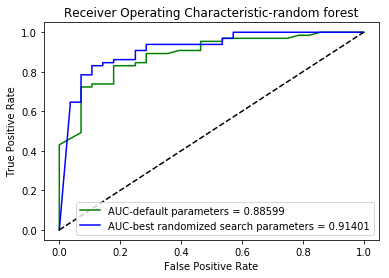

In [238]:
plt.title('Receiver Operating Characteristic-random forest')
plt.plot(false_positive_rate1, true_positive_rate1, 'g',
label='AUC-default parameters = %0.5f'% roc_auc1)


plt.plot(false_positive_rate2, true_positive_rate2, 'b',
label='AUC-best randomized search parameters = %0.5f'% roc_auc2)


plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The AUROC of tuned model is more than that of default model. And thus we can say that the model with tuned hyperparameters is better.

#### Conclusion

Hyperparameter optimization is an important part of any modern machine learning pipeline to achieve performance gains.
Since hyperparameters tuning take up most of the time while working on a model and they decide the performance, in the long run, we need to take steps to tune them, that in turn, decides the stability of the model. Choosing Correct Hyperparameters for our model will not only decide the time taken by a model to reach its convergence or reduce loss but can also decide the decisions and iterations needed to get better results faster. With a caution that it must be implemented correctly. 